In [2]:
import pandas as pd
import numpy as np

In [3]:
import glob

csvs = glob.glob("*.csv")

csvs

['states0.csv',
 'states1.csv',
 'states2.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states7.csv',
 'states8.csv',
 'states9.csv']

In [4]:
census_df = pd.read_csv(csvs[0])

census_df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [5]:
# Drop the first csv files as we have already read that
csvs = csvs[1:]

# Temp list to store all dfs
li = [census_df]

for csv in csvs:
    df = pd.read_csv(csv)
    li.append(df)

census_df = pd.concat(li, axis=0)

print(census_df.shape)

census_df.sample(5)

(60, 11)


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
1,1,Kansas,2892987,11.644342105263148%,75.95828947368425%,6.5678947368421%,0.7339473684210529%,2.331052631578946%,NaN,$53885.612648221344,1439862M_1453125F
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,$46296.807763401106,2322409M_2455167F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,$50690.194986743794,9600009M_10045763F
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,$47328.083616587355,3167756M_3331859F


### Data Pre-Processing

In [6]:
# Reset Index
census_df = census_df.reset_index(drop=True)

census_df.head(15)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


In [7]:
# Drop the unnecessary "Unnamed column"
census_df = census_df.drop("Unnamed: 0", axis=1)


In [8]:
census_df.head(5)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [9]:
## Check the data types of columns
census_df.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [10]:
# Convert dtypes to relevant types instead of generic objects
census_df['State'] = census_df['State'].astype('string')

In [11]:
## Correct the datatypes of Hispanic, White, Black, Native, Asian, Pacific columns
race_cols = ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]

## Remove % from percentages
census_df[race_cols] = census_df[race_cols].apply(lambda x: x.str.replace('%',''))

In [12]:
census_df[race_cols].head()

,Hispanic,White,Black,Native,Asian,Pacific
0,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865
1,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378
2,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833
3,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315
4,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353


In [13]:
## Convert race_cols to float
census_df[race_cols] = census_df[race_cols].astype('float').apply(lambda x: np.round(x, 2))

census_df[race_cols].head()

,Hispanic,White,Black,Native,Asian,Pacific
0,3.75,61.88,31.25,0.45,1.05,0.03
1,5.91,60.91,2.85,16.39,5.45,1.06
2,29.57,57.12,3.85,4.36,2.88,0.17
3,6.22,71.14,18.97,0.52,1.14,0.15
4,37.29,40.22,5.68,0.41,13.05,0.35


In [14]:
## Correct the Income column

census_df['Income'] = census_df['Income'].apply(lambda x: x.replace('$',''))

census_df['Income'].head()

0    43296.35860306644
1    70354.74390243902
2    54207.82095490716
3    41935.63396778917
4    67264.78230266465
Name: Income, dtype: object

In [15]:
## Convert income to float
census_df["Income"] = census_df["Income"].astype('float').apply(lambda x: np.ceil(x))

census_df["Income"].head()

0    43297.0
1    70355.0
2    54208.0
3    41936.0
4    67265.0
Name: Income, dtype: float64

In [16]:
census_df['TotalPop'] = census_df['TotalPop'].astype('string')
census_df[['PopMale', 'PopFemale']] = census_df['GenderPop'].str.split('_', expand=True)

In [17]:
census_df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,PopMale,PopFemale
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43297.0,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70355.0,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54208.0,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41936.0,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67265.0,19087135M_19334329F,19087135M,19334329F


In [18]:
## Drop the Gender Pop column
census_df = census_df.drop('GenderPop', axis=1)

In [19]:
census_df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,PopMale,PopFemale
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43297.0,2341093M,2489527F
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70355.0,384160M,349215F
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54208.0,3299088M,3342840F
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41936.0,1451913M,1506295F
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67265.0,19087135M,19334329F


In [20]:
## Convert the PopMale and PopFemale to int

sep_pops = ['PopMale', 'PopFemale']

census_df[sep_pops] = census_df[sep_pops].apply(lambda x: x.str[:-1])


In [21]:
## Replace empty objects with 0
census_df[sep_pops] = census_df[sep_pops].apply(lambda x: x.replace('','0'))
census_df[sep_pops] = census_df[sep_pops].astype('int')

In [22]:
zero_males = census_df['PopMale'] == 0
zero_females = census_df['PopFemale'] == 0

print(len(census_df[zero_males]))
print(len(census_df[zero_females]))

0
3


In [23]:
census_df[zero_females]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,PopMale,PopFemale
23,Maryland,5930538,8.47,52.68,30.68,0.20,5.33,0.04,78766.0,2872643,0
24,Maryland,5930538,8.47,52.68,30.68,0.20,5.33,0.04,78766.0,2872643,0
31,Montana,1014699,3.27,86.42,0.43,7.06,0.57,0.07,47646.0,510163,0


In [24]:
# Fix values which have 0 population
census_df['TotalPop'] = census_df['TotalPop'].astype('int')
census_df.loc[zero_females, 'PopFemale'] = census_df.loc[zero_females, 'TotalPop'] - census_df.loc[zero_females, 'PopMale']

In [25]:
census_df[zero_females]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,PopMale,PopFemale
23,Maryland,5930538,8.47,52.68,30.68,0.20,5.33,0.04,78766.0,2872643,3057895
24,Maryland,5930538,8.47,52.68,30.68,0.20,5.33,0.04,78766.0,2872643,3057895
31,Montana,1014699,3.27,86.42,0.43,7.06,0.57,0.07,47646.0,510163,504536


In [26]:
## Check for any duplicate records
census_df[census_df.duplicated()]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,PopMale,PopFemale
6,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64658.0,2648667,2630239
12,Georgia,10006693,8.42,54.29,32.09,0.19,3.10,0.05,50812.0,4883331,5123362
18,Iowa,3093526,5.30,87.72,3.26,0.29,1.70,0.06,53018.0,1534595,1558931
24,Maryland,5930538,8.47,52.68,30.68,0.20,5.33,0.04,78766.0,2872643,3057895
30,Missouri,6045448,4.04,77.51,14.12,0.36,1.62,0.10,49764.0,2964003,3081445
36,New Jersey,8904413,18.75,56.49,14.39,0.12,8.16,0.03,76582.0,4343027,4561386
42,Ohio,11575977,3.67,75.90,16.21,0.17,1.62,0.02,49656.0,5662893,5913084
48,Rhode Island,1053661,13.36,74.33,5.68,0.35,3.25,0.04,59126.0,510388,543273
54,Utah,2903379,13.47,79.41,1.02,1.08,2.20,0.83,63489.0,1459229,1444150


In [27]:
census_df = census_df.drop_duplicates()

In [28]:
census_df[census_df.duplicated()]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,PopMale,PopFemale


In [29]:
census_df.dtypes

State         string
TotalPop       int32
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
PopMale        int32
PopFemale      int32
dtype: object

## EDA

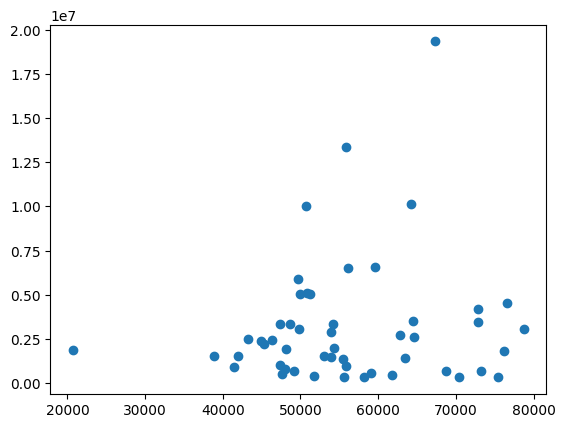

In [30]:
import matplotlib.pyplot as plt

plt.scatter(census_df['Income'], census_df['PopFemale'])

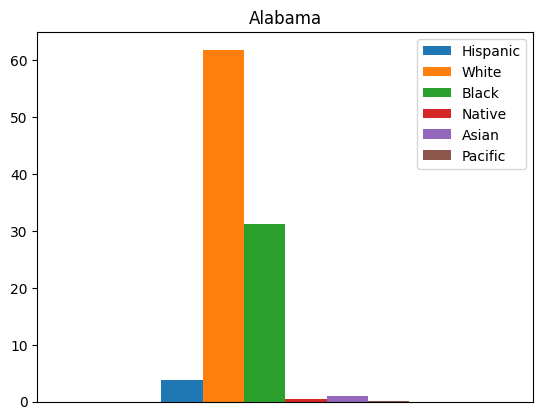

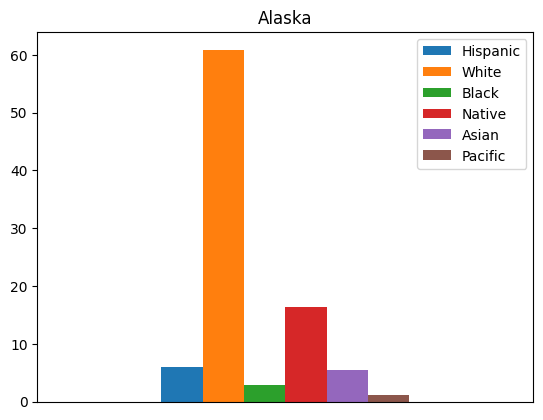

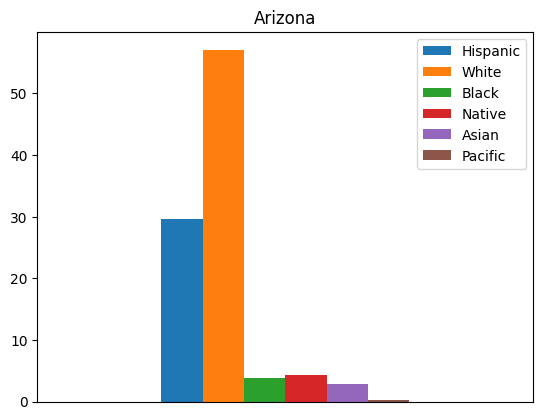

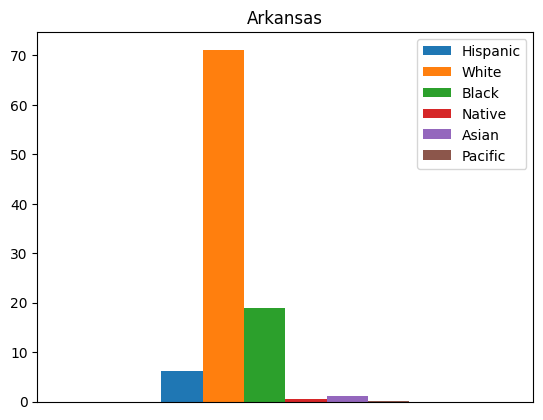

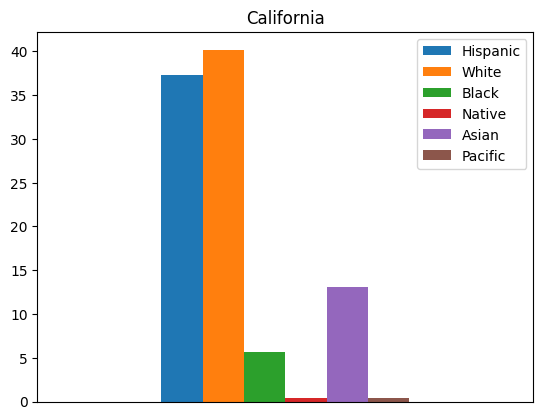

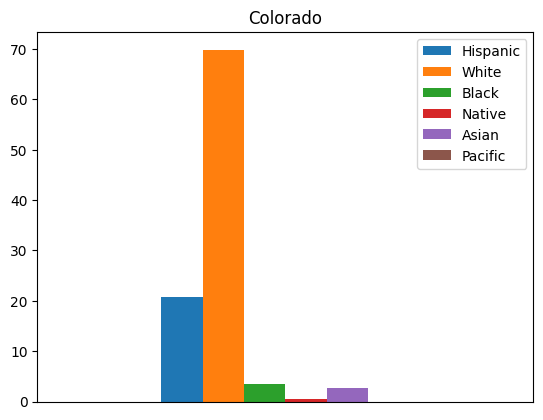

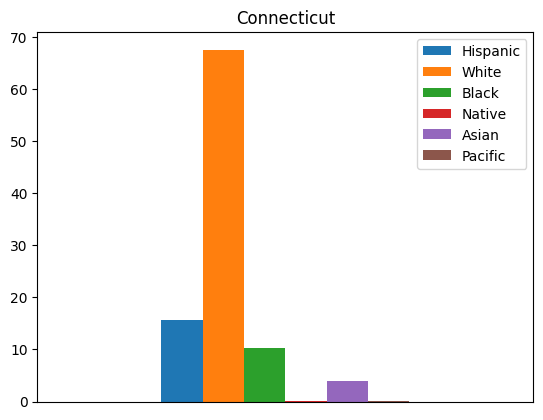

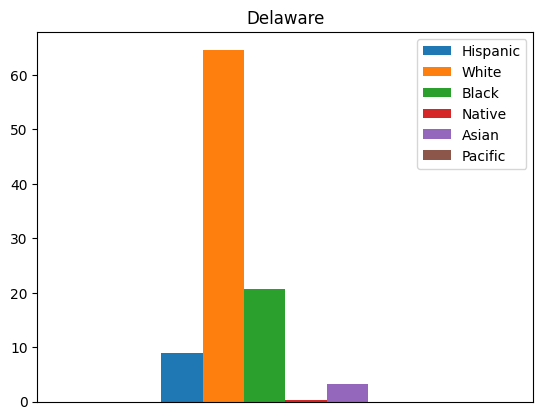

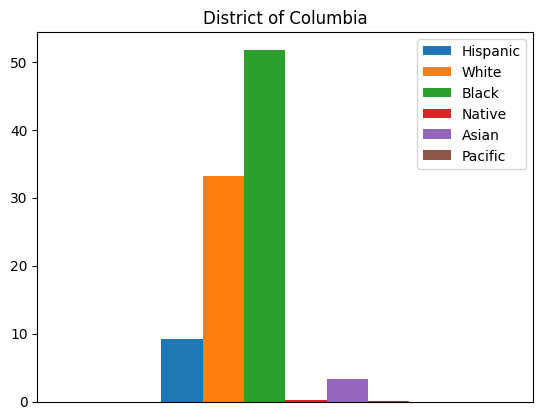

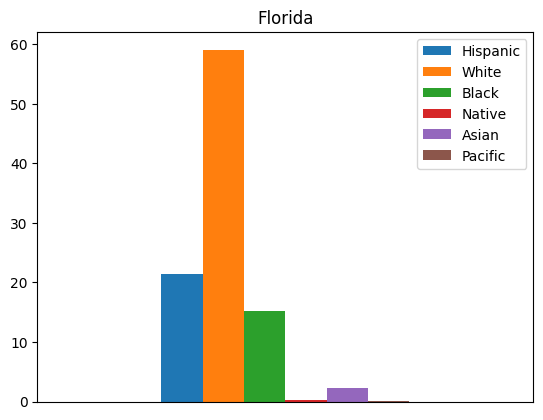

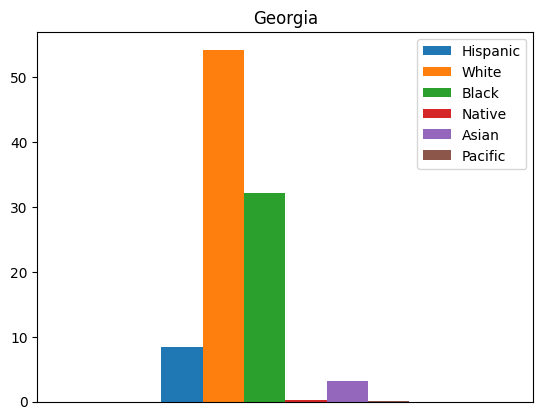

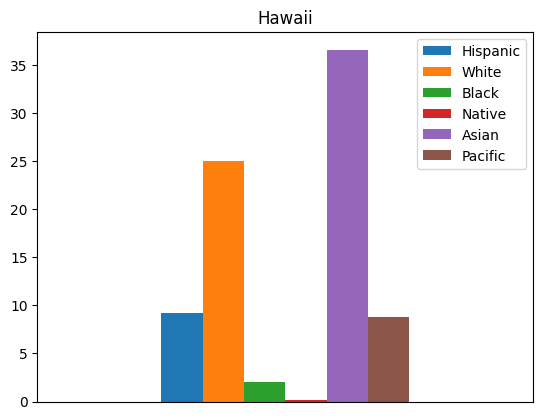

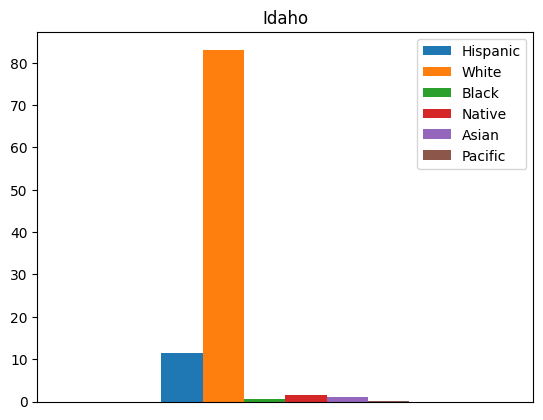

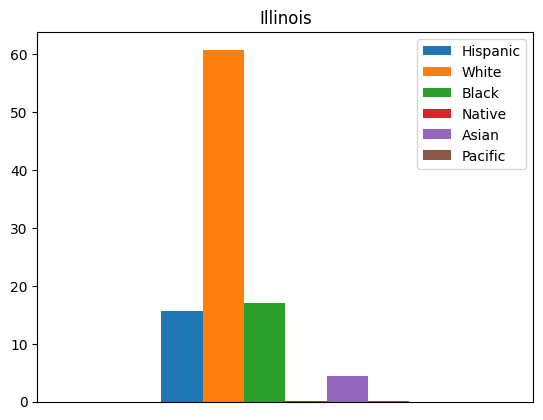

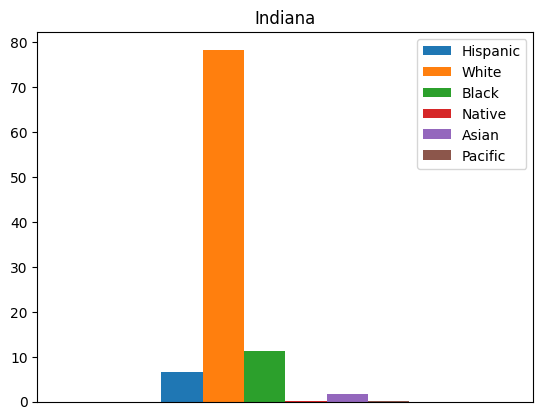

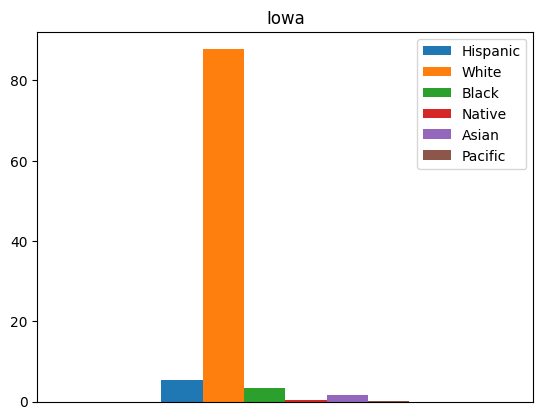

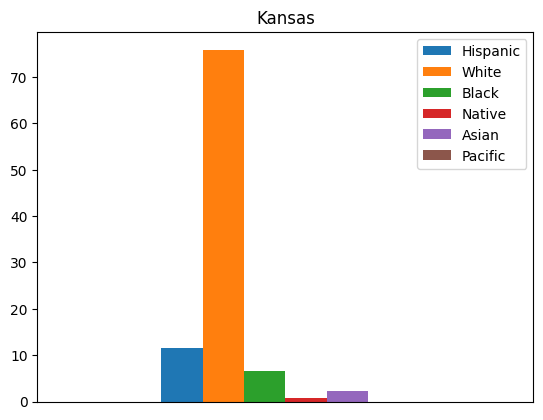

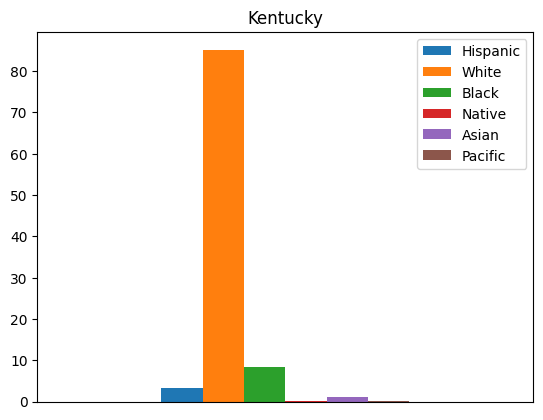

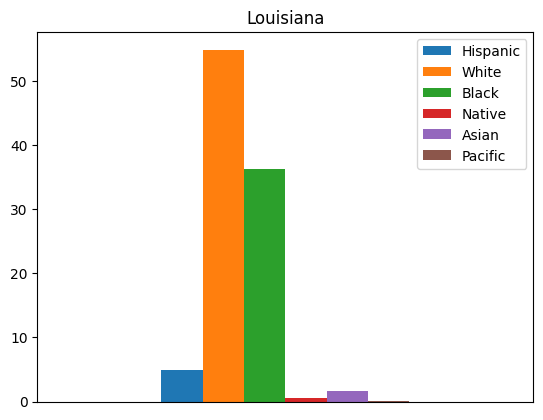

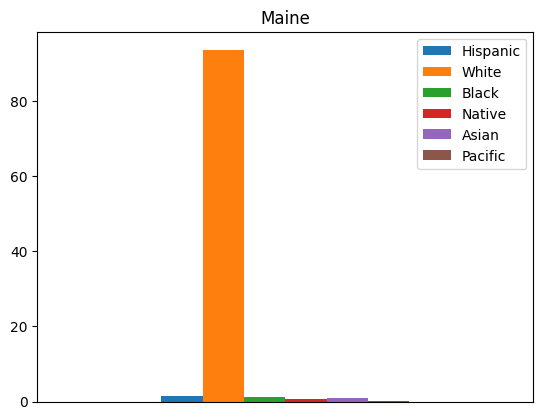

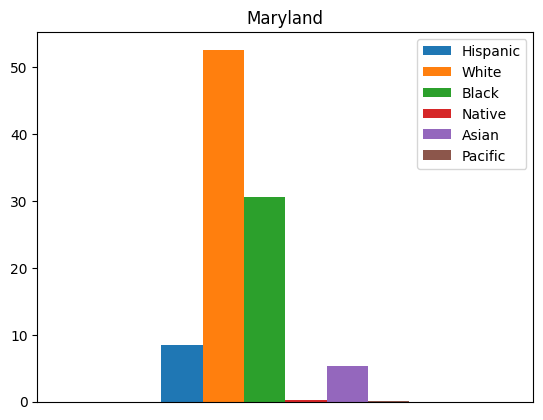

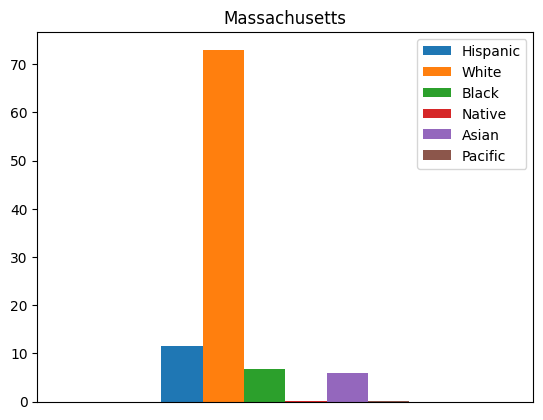

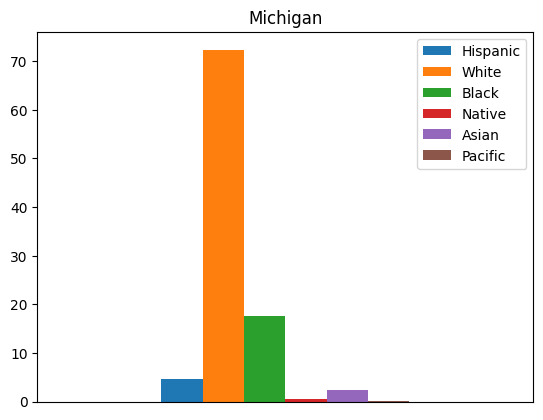

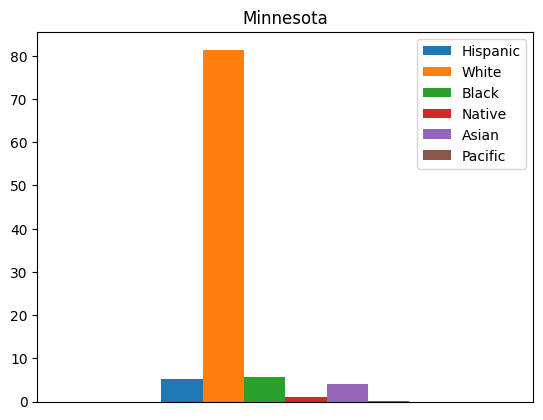

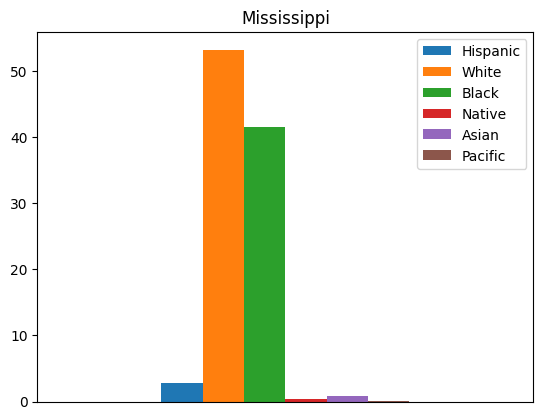

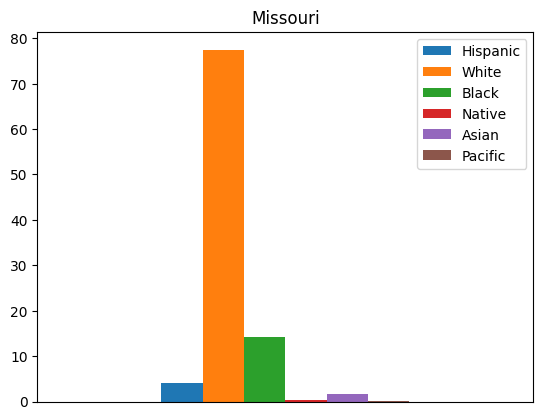

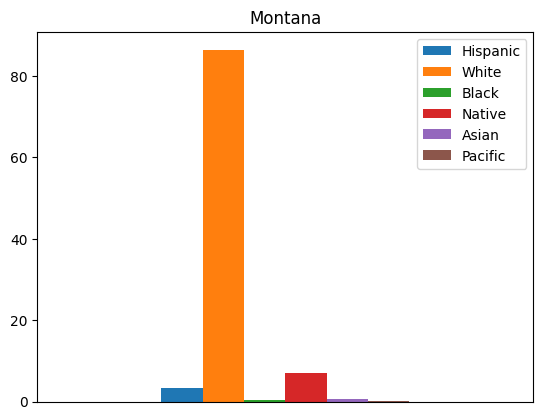

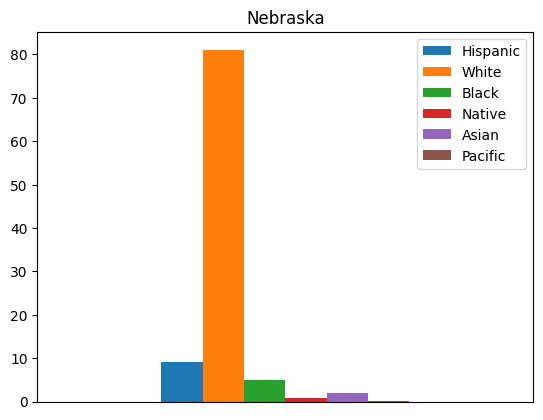

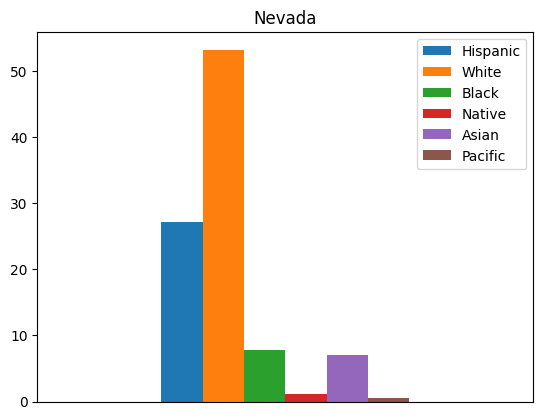

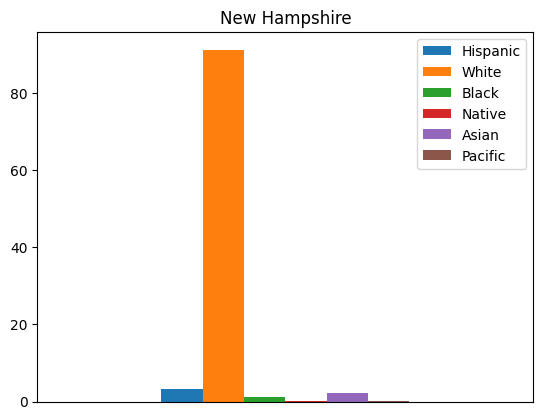

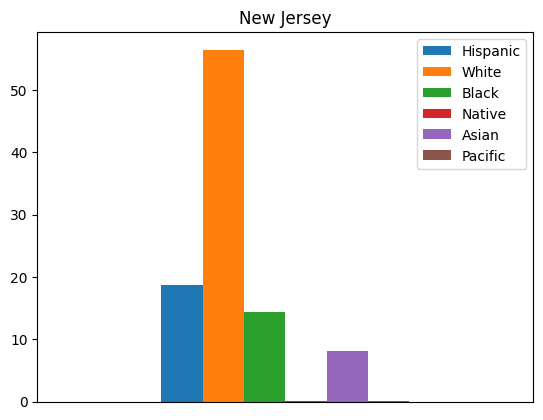

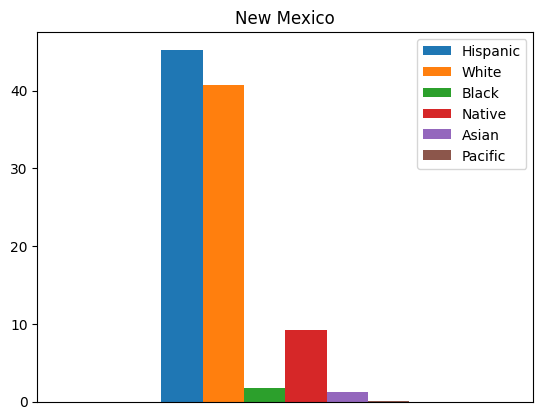

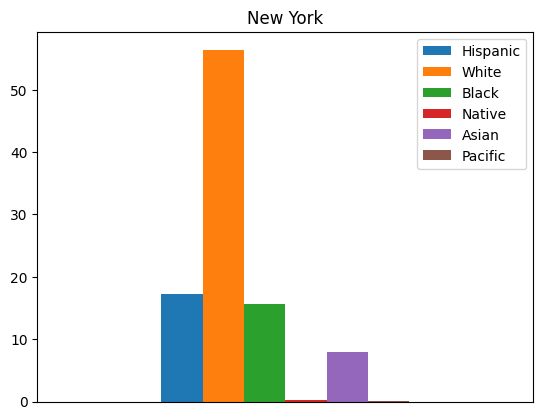

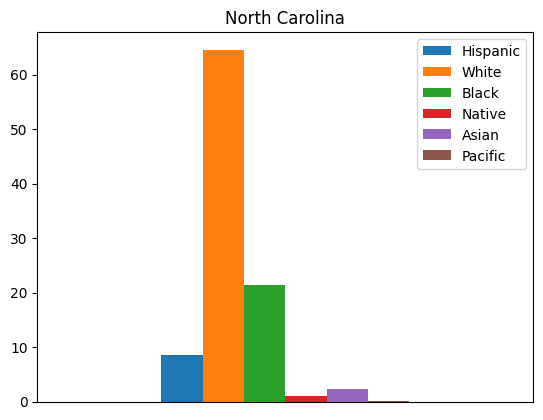

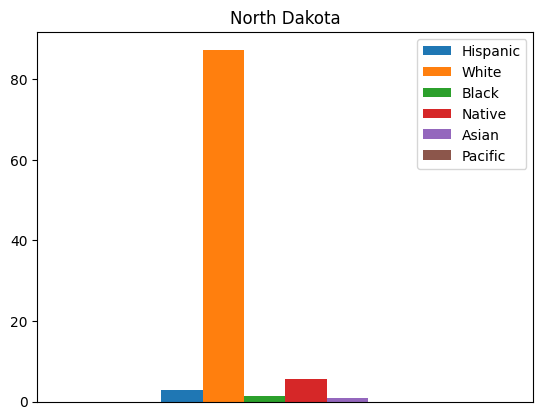

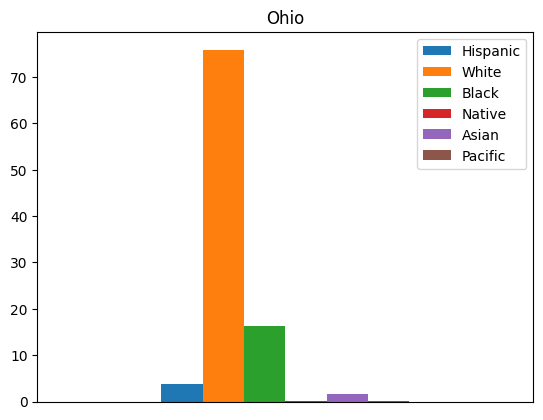

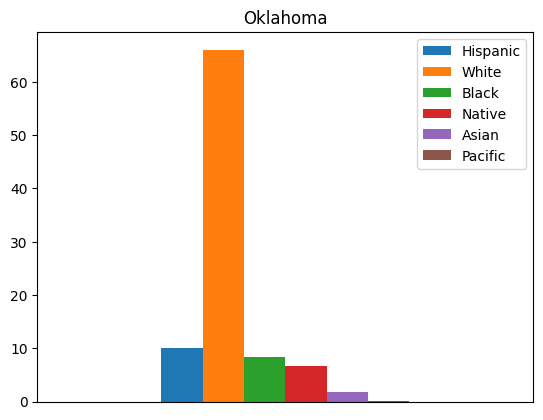

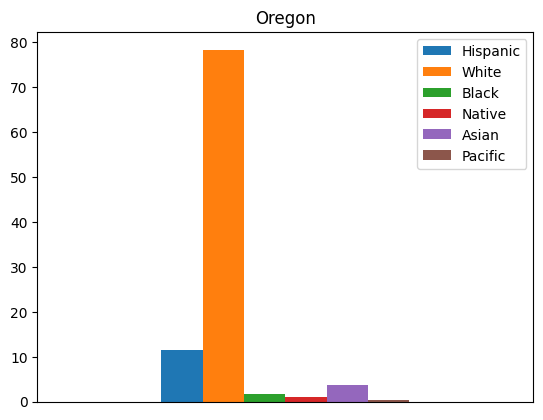

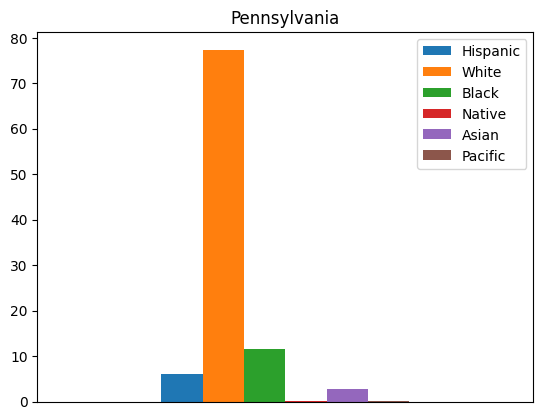

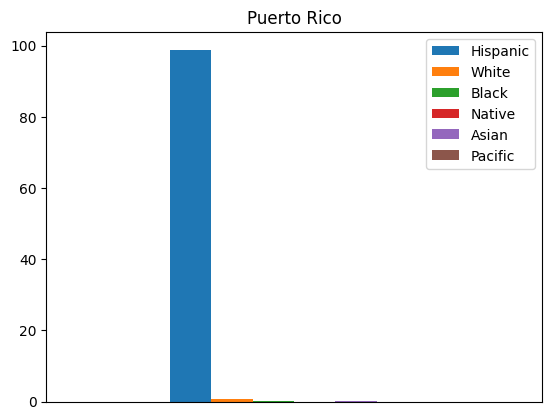

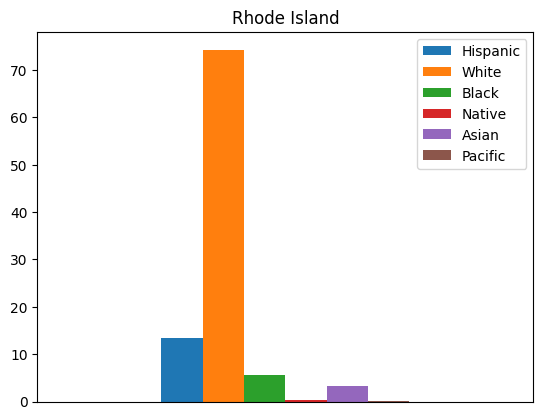

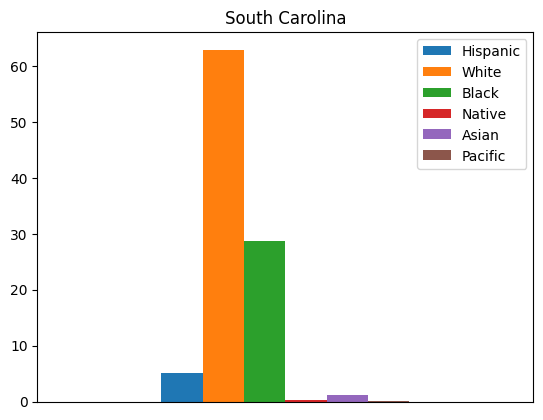

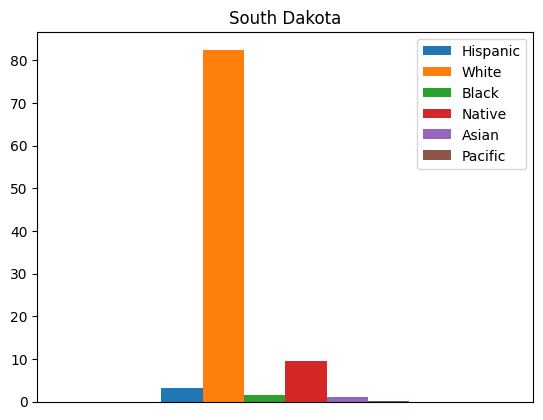

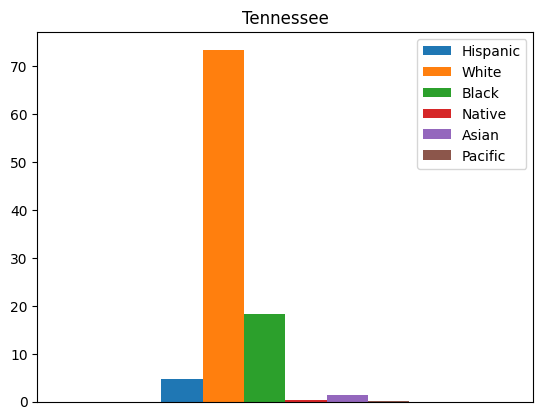

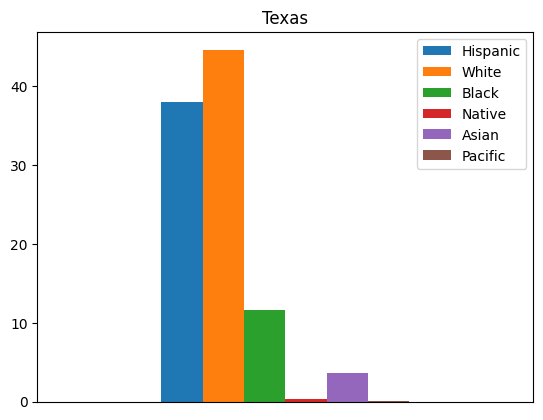

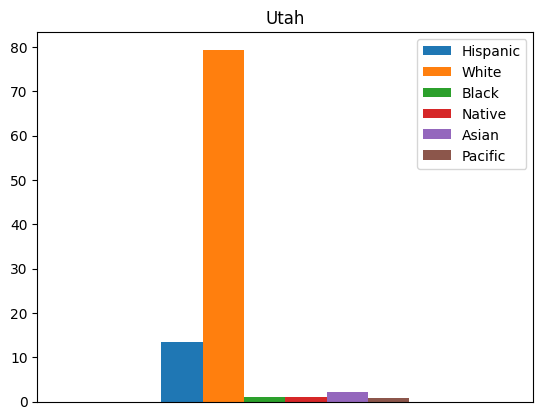

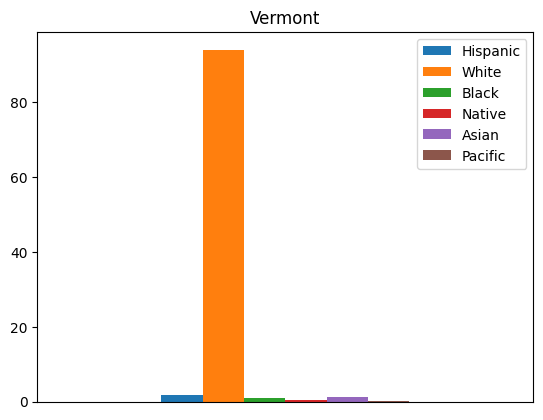

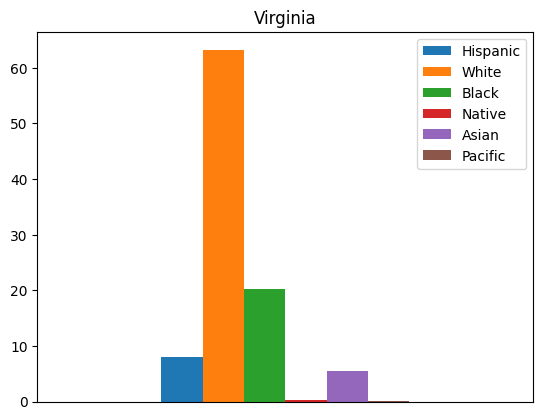

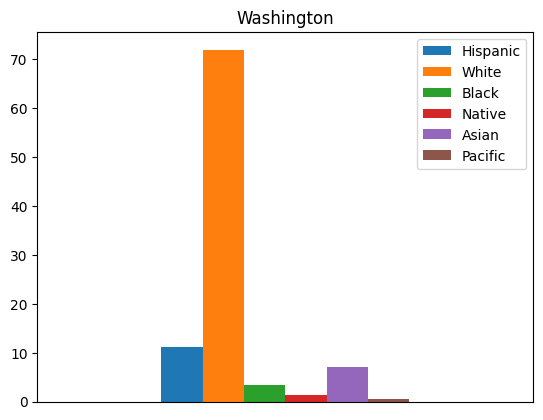

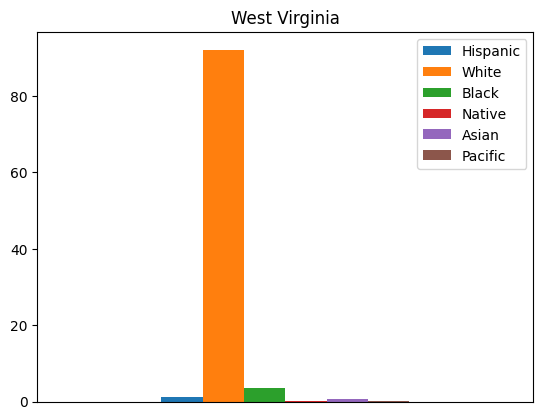

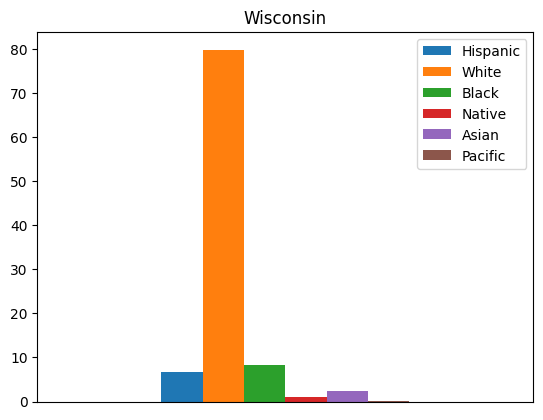

In [31]:
state_races = census_df.groupby('State')

for state, group in state_races:
    group[race_cols].plot(kind='bar', title=state)
    plt.xticks([])
    plt.show()